In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
from sklearn.datasets import load_breast_cancer

In [3]:
cancer=load_breast_cancer()

In [4]:
df=pd.DataFrame(cancer['data'],columns=cancer['feature_names'])

In [5]:
labels=cancer['target']

In [6]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
scaler=StandardScaler()
data=scaler.fit_transform(df)

In [8]:
data

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [9]:
pca=PCA(n_components=2)
pca.fit(data)
pca_data=pca.transform(data)

In [10]:
data.shape

(569, 30)

In [11]:
pca_data.shape

(569, 2)

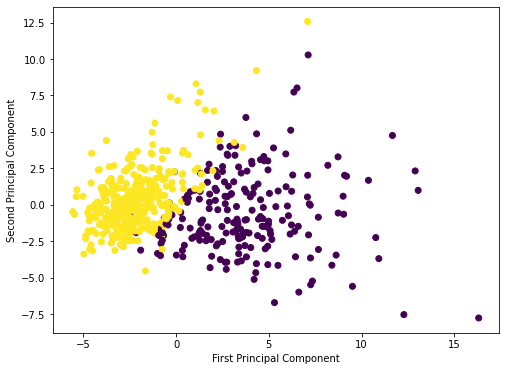

In [12]:
plt.figure(figsize=(8,6))
plt.scatter(pca_data[:,0],pca_data[:,1],c=labels)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

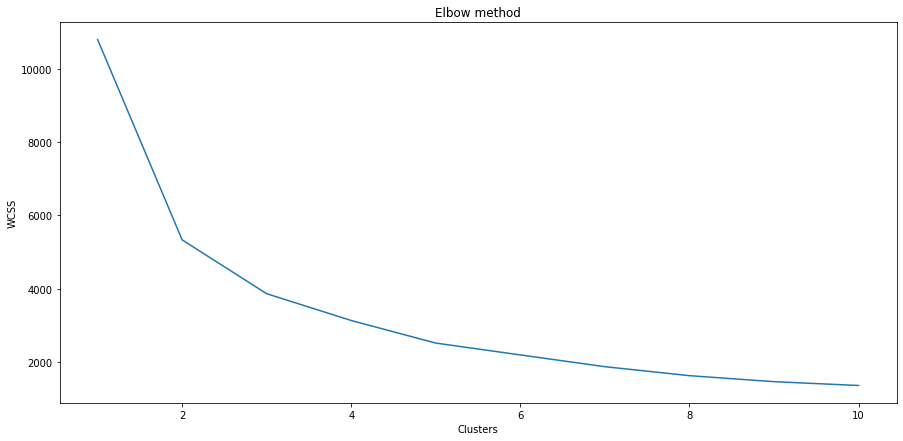

In [13]:
from sklearn.cluster import KMeans
import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples,silhouette_score
plt.figure(figsize=(15,7))
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=0)
    kmeans.fit(pca_data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Elbow method')
plt.xlabel('Clusters')
plt.ylabel('WCSS')
plt.show()

In [14]:
clusters=KMeans(n_clusters=3,random_state=0)
cluster_labels=clusters.fit_predict(pca_data)
print(cluster_labels)
print('K means Silhouette Score:',silhouette_score(pca_data,cluster_labels))

[1 1 1 0 1 0 1 0 0 0 2 1 1 2 0 0 2 0 1 2 2 2 0 1 1 1 0 1 1 1 1 0 1 1 0 1 0
 2 2 0 2 0 1 0 2 1 2 0 2 2 2 2 2 1 2 2 1 0 2 2 2 2 0 2 0 0 2 2 0 2 1 0 1 2
 2 1 2 1 1 2 2 0 1 1 2 1 2 1 2 0 2 2 2 2 0 1 2 2 2 0 2 2 2 2 2 0 2 2 1 2 2
 0 0 0 2 2 2 0 0 2 2 1 1 2 2 2 2 1 0 1 2 1 1 2 1 2 2 2 0 2 2 1 2 2 2 0 0 0
 2 2 2 0 0 2 2 2 1 2 2 2 2 1 1 2 1 2 2 1 1 2 2 2 0 2 2 2 0 0 2 2 1 1 2 2 2
 2 2 2 2 2 0 2 2 0 0 2 0 1 1 0 2 1 1 0 2 2 2 2 0 2 1 2 1 0 0 0 0 2 1 1 2 2
 2 0 2 2 2 2 2 0 1 2 2 1 2 2 1 1 2 1 2 2 0 2 1 2 2 0 2 2 1 2 1 1 1 2 1 0 1
 0 1 2 1 2 1 1 2 2 2 0 2 2 1 2 2 2 2 2 2 2 1 2 1 0 2 2 2 2 0 2 0 2 2 2 2 2
 2 2 2 2 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 0 2 0 1 2 1 2 2 2 2 1 0 0 2 2
 2 2 1 2 1 2 1 2 2 2 1 2 2 2 2 2 2 2 0 1 0 2 2 0 2 2 2 2 2 2 2 2 1 1 2 1 1
 0 2 1 1 2 2 0 2 2 0 2 2 2 0 2 2 2 2 0 1 2 2 1 1 2 2 2 2 2 2 1 2 2 2 2 2 2
 2 1 2 2 2 2 2 2 2 2 1 2 2 2 0 2 2 2 2 2 2 2 2 0 2 1 1 2 2 2 2 2 2 0 1 2 2
 2 2 1 2 2 1 2 1 2 2 2 2 2 2 2 2 1 1 2 2 2 0 2 2 1 0 2 2 2 2 2 2 2 2 2 0 2
 2 2 2 2 0 2 1 2 2 2 2 1 

For n_clusters = 2 The average silhouette_score is : 0.5080905933294961
For n_clusters = 3 The average silhouette_score is : 0.4910071765416273
For n_clusters = 4 The average silhouette_score is : 0.4653818735556034
For n_clusters = 5 The average silhouette_score is : 0.3634494729170672
For n_clusters = 6 The average silhouette_score is : 0.3357708083327758
For n_clusters = 7 The average silhouette_score is : 0.3465195024417625
For n_clusters = 8 The average silhouette_score is : 0.36712256331457854


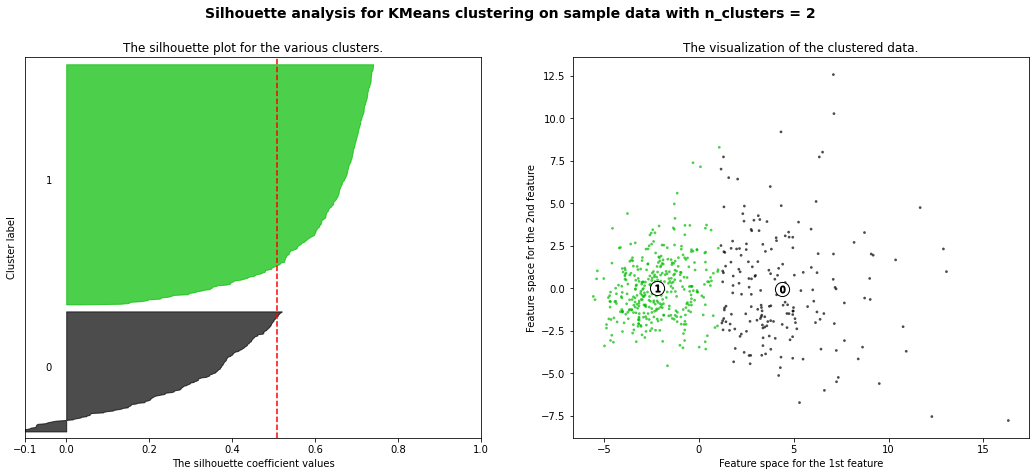

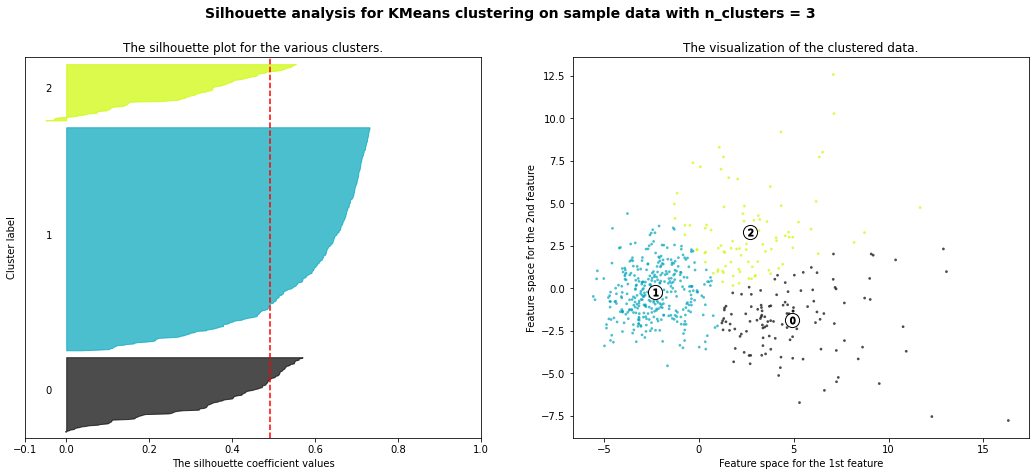

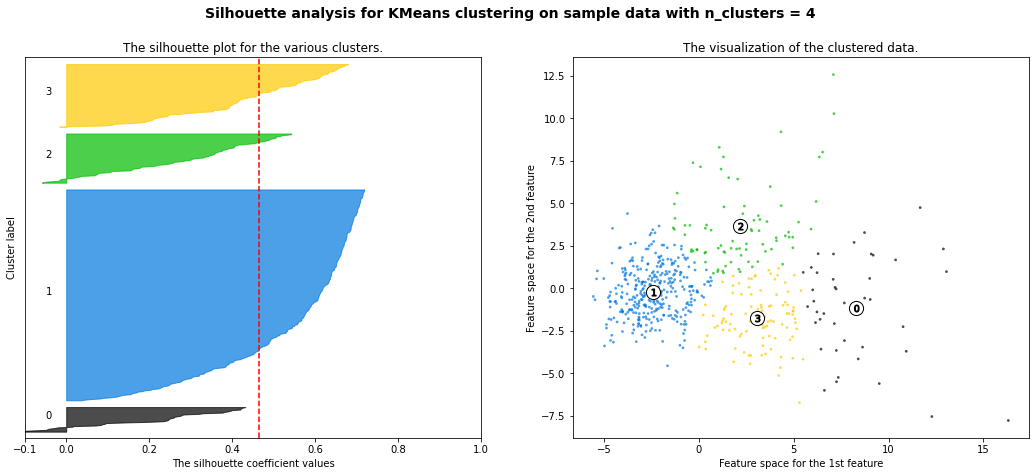

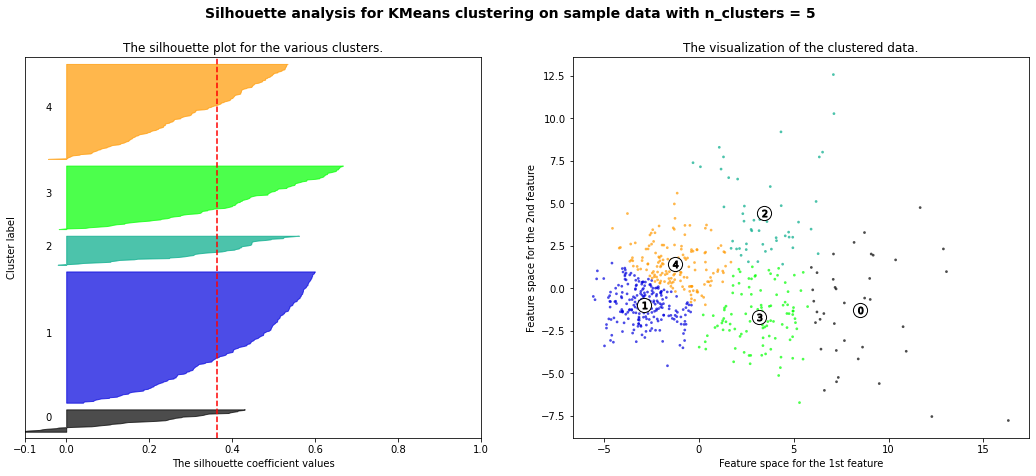

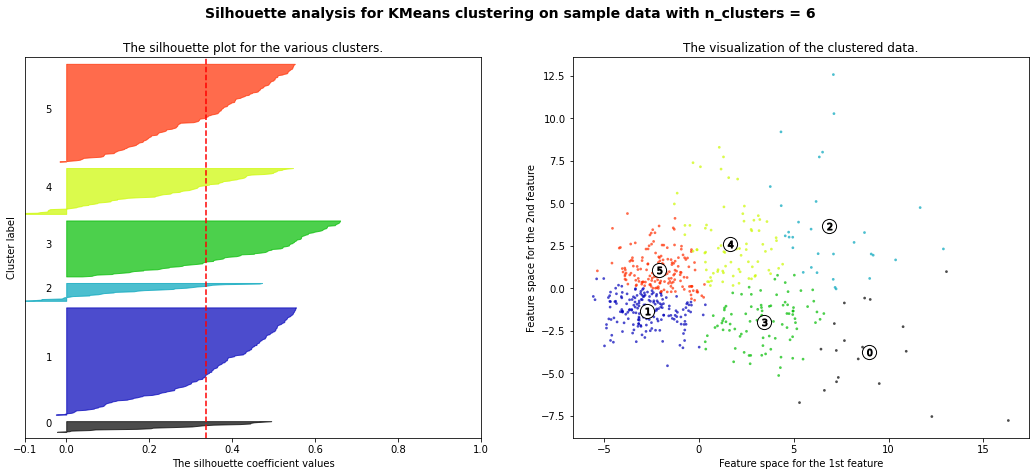

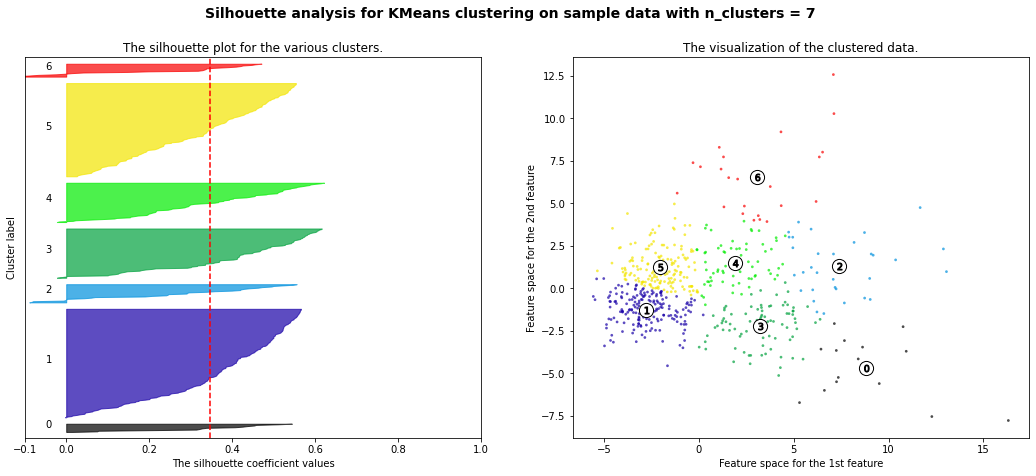

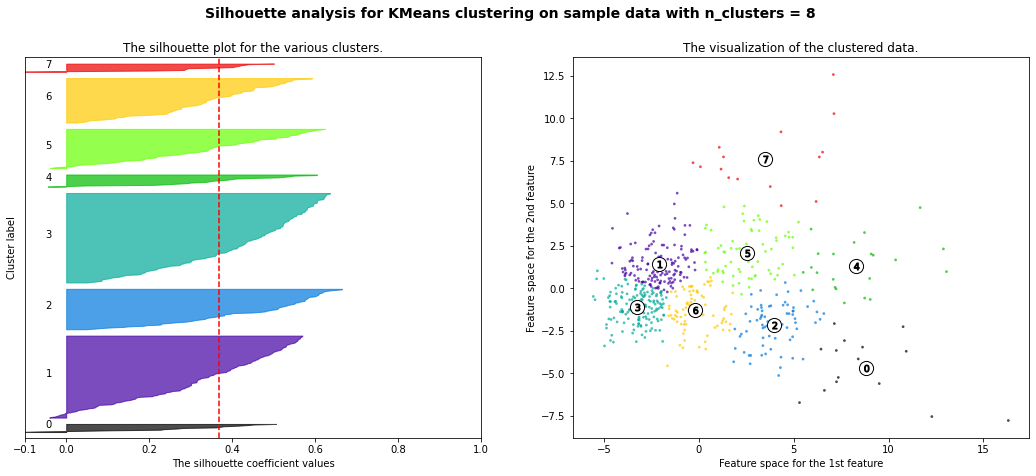

In [15]:
range_n_clusters = [2, 3, 4, 5, 6,7,8]
X=pca_data
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, n_init="auto", random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()